In [3]:
# Importing necessary libraries for data analysis
import pandas as pd   # pandas is used for data manipulation and analysis
import numpy as np    # numpy for numerical computations
import matplotlib.pyplot as plt   # matplotlib for creating visualizations
import seaborn as sns   # seaborn for statistical visualizations
from sklearn.cluster import KMeans   # KMeans clustering for customer segmentation
from sklearn.linear_model import LinearRegression   # Linear Regression for sales forecasting
from sklearn.model_selection import train_test_split   # For splitting the data into train/test sets
from sklearn.metrics import mean_squared_error, r2_score   # For evaluating regression models


In [5]:
# Step 1: Load the dataset
df = pd.read_csv('ecommerce_sales_data.csv', low_memory=False)
# This line reads the 'ecommerce_sales_data.csv' file into a pandas DataFrame.
# The 'low_memory=False' argument disables memory optimization, allowing pandas to 
# automatically detect column data types without truncating or making assumptions about the data. 
# It helps avoid warnings related to mixed data types in columns but may require more memory.

In [7]:
# Display the first few rows of the dataset to understand its structure
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [11]:
# Step 2: Data Preprocessing
# Checking for missing values in the dataset
df.isnull().sum()  # Shows the count of missing values per column

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [ ]:
# Check data types to ensure everything is in the correct format
print(df.dtypes)

In [21]:
 # Convert any categorical variables (e.g., "Product Category") to numerical values (if necessary)
print(df.columns)  # Print all column names in the DataFrame

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


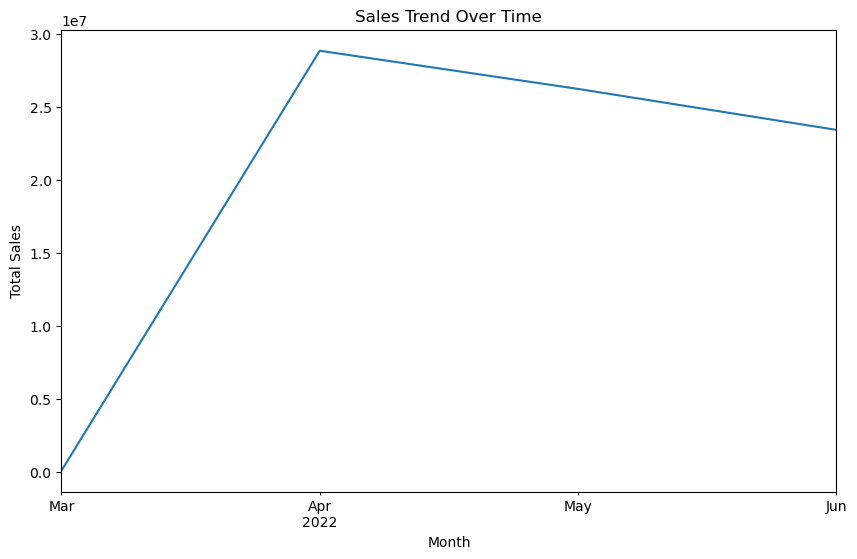

In [23]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualizing the distribution of sales over time
plt.figure(figsize=(10,6))

# Specify the date format explicitly (adjust this based on your data)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust the format string based on your data
df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().plot(kind='line')  # Monthly sales trend

plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


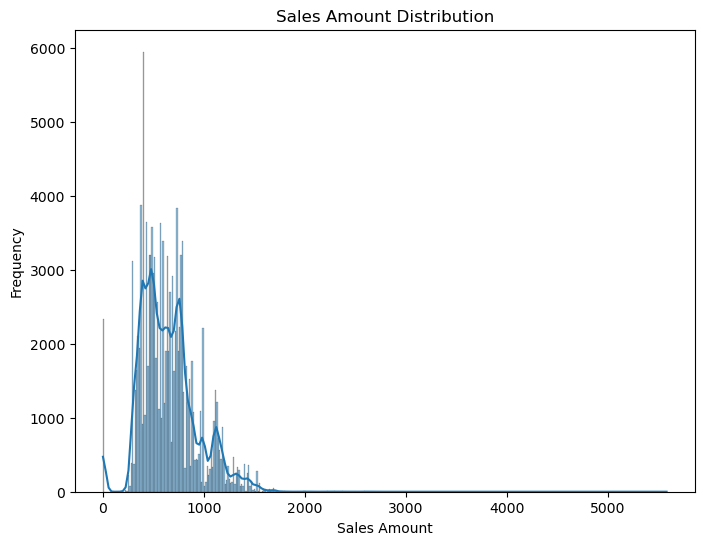

In [25]:
# Visualize the distribution of sales amount
plt.figure(figsize=(8,6))
sns.histplot(df['Amount'], kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Step 4: Customer Segmentation using KMeans
# Selecting relevant features for clustering: 'Amount' and 'Qty' for customer segmentation
X = df[['Amount', 'Qty']]  

In [31]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Feature scaling to normalize the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
from sklearn.impute import SimpleImputer

# Create an imputer object to fill missing values with the column mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the data
X_imputed = imputer.fit_transform(X)

# Now apply scaling after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Proceed with KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer Segment'] = kmeans.fit_predict(X_scaled)


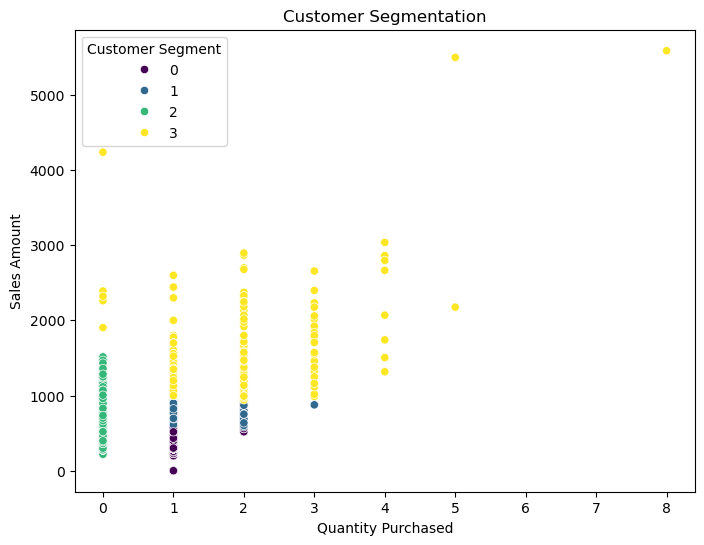

In [35]:
# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Qty'], y=df['Amount'], hue=df['Customer Segment'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity Purchased')
plt.ylabel('Sales Amount')
plt.show()

In [37]:
# Step 5: Sales Prediction using Linear Regression
# Feature selection: Using 'Amount', 'Qty', and 'Category' to predict sales
X = df[['Amount', 'Qty', 'Category']]  # Multiple features now for improved prediction
y = df['Amount']   # Dependent variable (Target)


In [39]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.isnull().sum())  # Check null values for each column in X_train
# Select numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
print(np.isnan(X_train_numeric).sum())  # Check total NaN values in numeric columns


Amount      6259
Qty            0
Category       0
dtype: int64
Amount    6259
Qty          0
dtype: int64


In [45]:
# Fill missing "Amount" values with the mean of the column
X_train['Amount'] = X_train['Amount'].fillna(X_train['Amount'].mean())

# Check if missing values are handled
print(X_train.isnull().sum())


Amount      0
Qty         0
Category    0
dtype: int64


In [47]:

print(np.isnan(y_train).sum())  # To count NaNs in a numpy array
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))


6259


In [51]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_columns = X_train.select_dtypes(include=['number'])
non_numeric_columns = X_train.select_dtypes(exclude=['number'])

# Impute numeric columns with mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = numeric_imputer.fit_transform(numeric_columns)
X_test_numeric = numeric_imputer.transform(X_test[numeric_columns.columns])

# Impute non-numeric columns with most_frequent strategy
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
X_train_non_numeric = non_numeric_imputer.fit_transform(non_numeric_columns)
X_test_non_numeric = non_numeric_imputer.transform(X_test[non_numeric_columns.columns])

# Combine the imputed numeric and non-numeric data back into DataFrames
import pandas as pd

X_train_imputed = pd.DataFrame(
    data=np.hstack([X_train_numeric, X_train_non_numeric]),
    columns=list(numeric_columns.columns) + list(non_numeric_columns.columns)
)

X_test_imputed = pd.DataFrame(
    data=np.hstack([X_test_numeric, X_test_non_numeric]),
    columns=list(numeric_columns.columns) + list(non_numeric_columns.columns)
)


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Example dataset structure
# X_train = pd.DataFrame({
#     'Category': ['Western Dress', 'Ethnic Wear', 'Casual Wear'],
#     'Price': [1000, 1500, None]
# })
# y_train = [2000, 3000, 2500]

# Separate numeric and categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric data
    ('scaler', StandardScaler())                 # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical data
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Encode categorical features
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Linear regression model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
print(y_pred)


[ 886.00000422 1647.99998722  486.99999546 ... 1139.99999855  399.00000665
  625.00001004]


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example data structure (replace with your actual dataset)
# X_train = pd.DataFrame({
#     'Category': ['Western Dress', 'Ethnic Wear', None],
#     'Price': [1000, 1500, None]
# })
# y_train = [2000, 3000, 2500]

# Identify categorical and numeric columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Imputer for numeric features (mean strategy)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Imputer and encoder for categorical features (most frequent + one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical data
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categories
])

# Combine numeric and categorical preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Define pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
print(y_pred)


[ 885.99998987 1647.99992104  486.99999438 ... 1139.99996692  398.9998667
  625.00001344]


In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Check if there are NaN values in y_test and y_pred
if np.any(np.isnan(y_test)) or np.any(np.isnan(y_pred)):
    # Handle NaN values by removing the rows with NaN in y_test or y_pred
    valid_indices = ~np.isnan(y_test) & ~np.isnan(y_pred)
    y_test_clean = y_test[valid_indices]
    y_pred_clean = y_pred[valid_indices]
else:
    y_test_clean = y_test
    y_pred_clean = y_pred

# Now calculate the evaluation metrics
mse = mean_squared_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5.788631092118942e-09
R-squared: 0.999999999999928


In [73]:
print(X_test.columns)

Index(['Amount', 'Qty', 'Category'], dtype='object')


In [75]:
# Check if X_test is a DataFrame or numpy array
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>


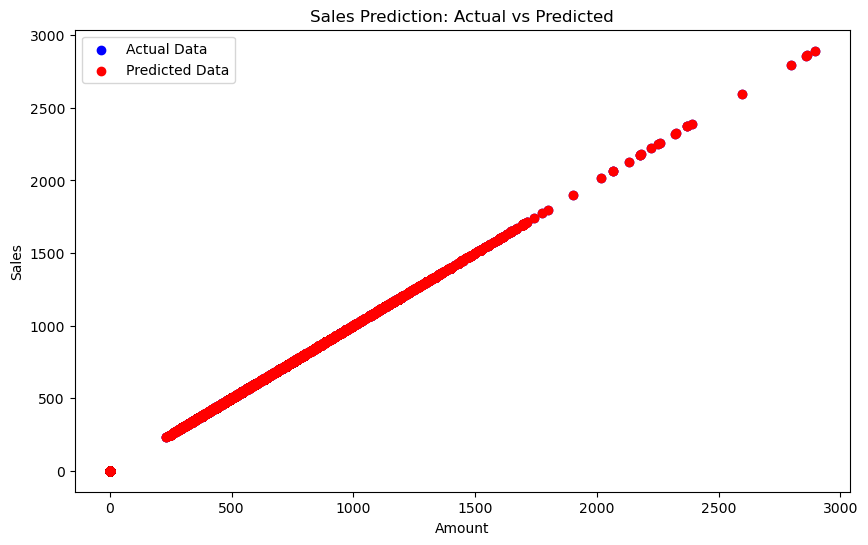

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Amount'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Amount'], y_pred, color='red', label='Predicted Data')
plt.title('Sales Prediction: Actual vs Predicted')
plt.xlabel('Amount')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [85]:
# Ensure 'Amount' is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Converts non-numeric values to NaN if present

# Encode 'Category' as numeric using label encoding or one-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category_Label'] = label_encoder.fit_transform(df['Category'])  # Converts categories to integers

# Calculate the interaction term
df['Amount_Category_Interaction'] = df['Amount'] * df['Category_Label']

# View the resulting dataframe
print(df[['Amount', 'Category', 'Category_Label', 'Amount_Category_Interaction']].head())



   Amount       Category  Category_Label  Amount_Category_Interaction
0  647.62            Set               5                      3238.10
1  406.00          kurta               8                      3248.00
2  329.00          kurta               8                      2632.00
3  753.33  Western Dress               7                      5273.31
4  574.00            Top               6                      3444.00


In [87]:
# Re-run regression model with new features
X = df[['Amount', 'Qty', 'Category', 'Amount_Category_Interaction']]  # Including interaction term
X_train, X_test#, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(            Amount  Qty       Category
 124474    0.000000    1  Western Dress
 1675    540.000000    1            Top
 63504   399.000000    1          kurta
 61765   771.000000    1  Western Dress
 10986   571.000000    1            Set
 ...            ...  ...            ...
 128106  376.000000    1          kurta
 103694  496.000000    1          kurta
 860     249.000000    1          kurta
 15795   647.642931    0          kurta
 121958  735.000000    1  Western Dress
 
 [103180 rows x 3 columns],
         Amount  Qty Category
 57259    886.0    1      Set
 12804   1648.0    1      Set
 113885   487.0    1    kurta
 8954     588.0    1      Top
 59205    988.0    1      Set
 ...        ...  ...      ...
 90722    671.0    1    kurta
 71450      NaN    0      Set
 10571   1140.0    1      Set
 47479    399.0    1      Top
 39216    625.0    1      Set
 
 [25795 rows x 3 columns])

In [91]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate numeric and categorical columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(exclude=['number']).columns

# Imputer for numeric columns (mean strategy)
numeric_imputer = SimpleImputer(strategy='mean')

# Imputer for categorical columns (most_frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
X_train_numeric = pd.DataFrame(numeric_imputer.fit_transform(X_train[numeric_columns]), columns=numeric_columns)
X_train_categorical = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_columns]), columns=categorical_columns)

# Combine numeric and categorical columns
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical], axis=1)

# Repeat for X_test
X_test_numeric = pd.DataFrame(numeric_imputer.transform(X_test[numeric_columns]), columns=numeric_columns)
X_test_categorical = pd.DataFrame(categorical_imputer.transform(X_test[categorical_columns]), columns=categorical_columns)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# Check the result
print(X_train_imputed.head())
print(X_test_imputed.head())



   Amount  Qty       Category
0     0.0  1.0  Western Dress
1   540.0  1.0            Top
2   399.0  1.0          kurta
3   771.0  1.0  Western Dress
4   571.0  1.0            Set
   Amount  Qty Category
0   886.0  1.0      Set
1  1648.0  1.0      Set
2   487.0  1.0    kurta
3   588.0  1.0      Top
4   988.0  1.0      Set


In [97]:
import numpy as np

# Check for missing values in y_train
missing_values_count = np.isnan(y_train).sum()

print(f"Missing values in y_train: {missing_values_count}")




Missing values in y_train: 0


In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['Category'] = label_encoder.fit_transform(X_train['Category'])
X_test['Category'] = label_encoder.transform(X_test['Category'])


In [105]:
from sklearn.impute import SimpleImputer

# Create the imputer (choose an appropriate strategy: mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data (if not already done)
X_train = imputer.fit_transform(X_train)

# Transform the test data (to match the training set)
X_test = imputer.transform(X_test)

# Now you can fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [107]:
print(np.isnan(y_pred).sum())

0


In [109]:
print(y_test.isnull().sum())

1536


In [111]:
y_test.fillna(y_test.mean(), inplace=True)  # Impute missing y_test values

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [115]:
# Output the evaluation metrics
print(f"Updated Mean Squared Error (MSE): {mse}")
print(f"Updated R-squared (R2): {r2}")

Updated Mean Squared Error (MSE): 1.2536075681604628
Updated R-squared (R2): 0.9999834164470645


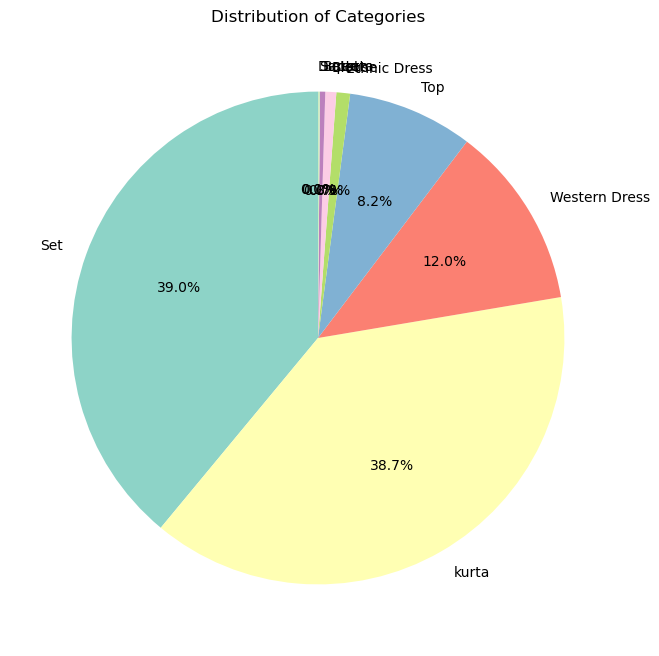

C:\Users\Asus\AppData\Local\Temp\ipykernel_11848\1783261858.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime if necessary


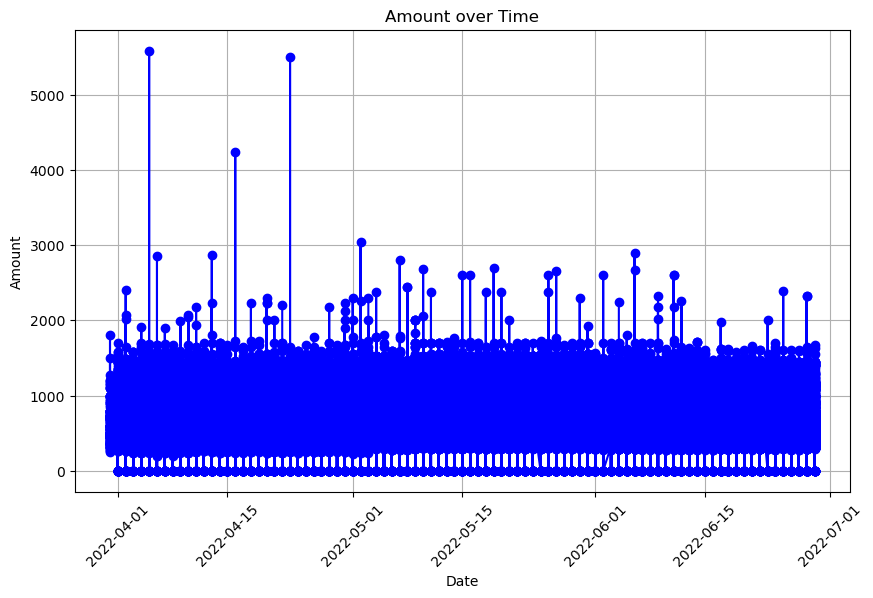

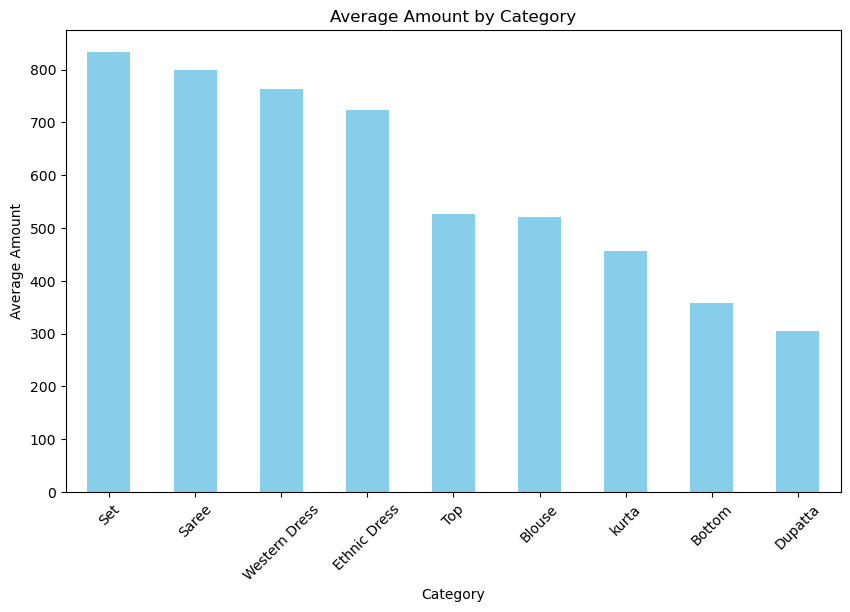

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded and cleaned the dataset
# For example, let's assume your DataFrame is called 'df'

# Pie Chart: Display the distribution of different categories
def plot_pie_chart(df):
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(8, 8))
    category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title('Distribution of Categories')
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Line Graph: Plot Amount over time or Date
def plot_line_graph(df):
    # Assuming there's a Date column that needs to be converted to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime if necessary
    df.sort_values('Date', inplace=True)
    
    # Plotting line graph for 'Amount' over 'Date'
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Amount'], marker='o', color='b')
    plt.title('Amount over Time')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Bar Graph: Average Amount for each Category
def plot_bar_graph(df):
    # Group by Category and calculate average Amount
    avg_amount_by_category = df.groupby('Category')['Amount'].mean().sort_values(ascending=False)
    
    # Plotting bar graph for average 'Amount' by 'Category'
    plt.figure(figsize=(10, 6))
    avg_amount_by_category.plot(kind='bar', color='skyblue')
    plt.title('Average Amount by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Amount')
    plt.xticks(rotation=45)
    plt.show()

# Assuming you have a cleaned and preprocessed DataFrame `df`
# Example of how to call the functions:

plot_pie_chart(df)  # Pie chart for Category distribution
plot_line_graph(df)  # Line graph for Amount over Date
plot_bar_graph(df)  # Bar graph for Average Amount by Category

